

Question to answer, geographically, how do the locations of encampments compare to the reports for behavior

The source of the information is from the San Francisco Open Data Portal
On that portal, I've created a dataset of Encampments
https://data.sfgov.org/profile/Gregory/xm4t-k5h4?q=encampment&sortBy=relevance&utf8=%E2%9C%93


# San Francisco Graffiti with Video





Import Libraries & get url


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline




## Get yesterday variable in bash and format it for url

In [23]:
#date format 'year-mm-dd'
# date -d "2 weeks ago"

yesterday = !date -d "yesterday 13:00 " '+%Y-%m-%d'

twoDaysAgo = !date -d "2 days ago 13:00 " '+%Y-%m-%d'
oneWeekAgo = !date -d "1 week ago 13:00 " '+%Y-%m-%d'

beginDate = twoDaysAgo
print(yesterday, twoDaysAgo, oneWeekAgo, beginDate)
startdate = str(beginDate)[1:-1]



#hard code option
#startdate = "'2016-12-09'"

['2016-12-12'] ['2016-12-11'] ['2016-12-06'] ['2016-12-11']


### get url

In [24]:
#url = 'https://data.sfgov.org/resource/gbya-e2d3.csv' // homeless
#url = 'https://data.sfgov.org/resource/gbya-e2d3.csv'
url = 'https://data.sfgov.org/resource/rme2-xgvs.csv'
modify= "?$where=opened"
operator = '>='
#date format 'year-mm-dd'


url = url + modify + operator + str(startdate)
print(url)


https://data.sfgov.org/resource/rme2-xgvs.csv?$where=opened>='2016-12-11'


In [25]:
#df1 = pd.read_csv(url)
#df2 = pd.read_csv(url2)
#df =  pd.concat([df1,df2])

## Set Display Column with wider so no problem with Media URL series

In [26]:
pd.options.display.max_colwidth=115

## Setup to display images - working, work to do

In [27]:
from IPython.display import Image
from IPython.core.display import HTML 
from IPython.core.display import Image, display



## create data frame

In [28]:
df = pd.read_csv(url)

In [29]:
df.shape

(393, 16)

#### wow, 5 days > 1000 reports

In [30]:
df.head(3)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,6622222,12/12/2016 11:37:32 PM,NaN,12/13/2016 12:07:17 AM,Open,accepted,DPW Ops Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Bridge - Not_Offensive,Intersection of UTAH ST and 18TH ST,10.0,Potrero Hill,"(37.7619963623611, -122.406181987439)",Voice In,NaN
1,6622177,12/12/2016 10:33:27 PM,NaN,12/12/2016 10:33:27 PM,Open,Open,RPD NSA Queue,Graffiti Public Property,Offensive Graffiti on Public Property,Other_enter_additional_details_below - Offensive,"Utah and 18th Mini Park, , SAN FRANCISCO, CA, 94110",10.0,Potrero Hill,"(37.762517422, -122.4059977)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/584f96043da19793c74cd71b/report.jpg
2,6622153,12/12/2016 10:09:39 PM,NaN,12/12/2016 10:09:39 PM,Open,Open,US Postal Service Maintenance Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Mail_box - Not_Offensive,"416 TURK ST, SAN FRANCISCO, CA, 94102",6.0,Tenderloin,"(37.782661266452, -122.416191729766)",Open311,NaN


In [31]:
df['Opened'] = pd.to_datetime(df['Opened'])
df['Closed'] = pd.to_datetime(df['Closed'])
df['Updated'] = pd.to_datetime(df['Updated'])

In [32]:
df.head(3)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,6622222,2016-12-12 23:37:32,NaT,2016-12-13 00:07:17,Open,accepted,DPW Ops Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Bridge - Not_Offensive,Intersection of UTAH ST and 18TH ST,10.0,Potrero Hill,"(37.7619963623611, -122.406181987439)",Voice In,NaN
1,6622177,2016-12-12 22:33:27,NaT,2016-12-12 22:33:27,Open,Open,RPD NSA Queue,Graffiti Public Property,Offensive Graffiti on Public Property,Other_enter_additional_details_below - Offensive,"Utah and 18th Mini Park, , SAN FRANCISCO, CA, 94110",10.0,Potrero Hill,"(37.762517422, -122.4059977)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/584f96043da19793c74cd71b/report.jpg
2,6622153,2016-12-12 22:09:39,NaT,2016-12-12 22:09:39,Open,Open,US Postal Service Maintenance Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Mail_box - Not_Offensive,"416 TURK ST, SAN FRANCISCO, CA, 94102",6.0,Tenderloin,"(37.782661266452, -122.416191729766)",Open311,NaN


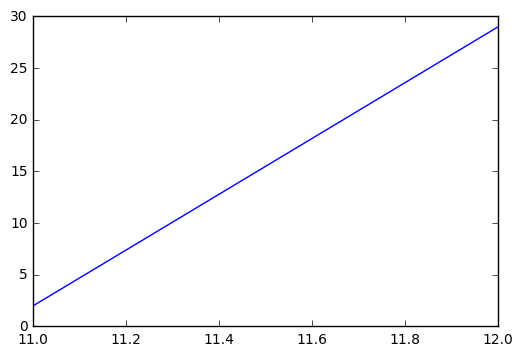

In [33]:
df.Closed.dt.day.value_counts().sort_index().plot()

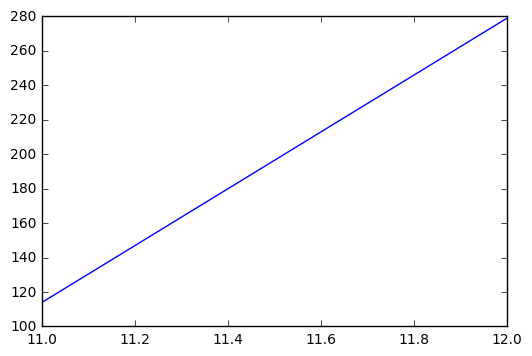

In [34]:
df.Opened.dt.day.value_counts().sort_index().plot()

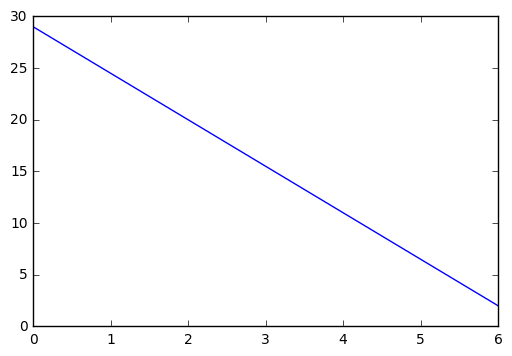

In [35]:
df.Closed.dt.weekday.value_counts().sort_index().plot()

In [36]:
df.columns

Index(['CaseID', 'Opened', 'Closed', 'Updated', 'Status', 'Status Notes',
       'Responsible Agency', 'Category', 'Request Type', 'Request Details',
       'Address', 'Supervisor District', 'Neighborhood', 'Point', 'Source',
       'Media URL'],
      dtype='object')

In [37]:

df['Request Details'].value_counts()


Other_enter_additional_details_below - Offensive    67
Building_commercial - Not_Offensive                 43
Building_other - Not_Offensive                      40
Pole - Not_Offensive                                22
Transit_Shelter_Platform - Not_Offensive            21
Signal_box - Not_Offensive                          20
Mail_box - Not_Offensive                            17
Building_residential - Not_Offensive                16
Sidewalk_in_front_of_property - Not_Offensive       16
Pole - Offensive                                    15
Building_commercial - Offensive                     15
Sign - Not_Offensive                                12
News_rack - Not_Offensive                           11
Signal_box - Offensive                              11
Transit_Shelter_Platform - Offensive                 7
Parking_meter - Not_Offensive                        6
Fire_Police_Callbox - Offensive                      5
Sidewalk_in_front_of_property - Offensive            5
City_recep

In [38]:
df['Supervisor District'].value_counts().sort_index()



1.0     10
2.0     28
3.0     41
4.0      3
5.0     94
6.0     37
7.0     10
8.0     43
9.0     83
10.0    20
11.0    23
Name: Supervisor District, dtype: int64

In [39]:
df.Neighborhood.value_counts()

Mission                    75
Duboce Triangle            28
Lower Pacific Heights      26
Chinatown                  24
Tenderloin                 19
Cayuga                     19
Western Addition           18
Lower Haight               16
Japantown                  16
South of Market            15
Mission Dolores            10
Hayes Valley               10
Alamo Square                8
Bayview                     7
Nob Hill                    6
Civic Center                6
Bernal Heights              5
Panhandle                   5
North Beach                 4
Lower Nob Hill              4
Dogpatch                    3
Downtown / Union Square     3
Potrero Hill                3
Silver Terrace              3
Portola                     3
Union Street                3
Inner Sunset                2
Outer Mission               2
Outer Sunset                2
Anza Vista                  2
Sutro Heights               2
Lone Mountain               2
Stonestown                  2
Golden Gat

In [40]:
df[df.Neighborhood == 'Mission']

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
63,6621818,2016-12-12 18:32:38,NaT,2016-12-12 18:32:38,Open,accepted,DPW Ops Queue,Graffiti Private Property,Not_Offensive Graffiti on Private Property,Sidewalk_in_front_of_property - Not_Offensive,"80 SYCAMORE ST, SAN FRANCISCO, CA, 94110",9.0,Mission,"(37.762709159942, -122.421032342788)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/584f5dbc3da19793c74ccfae/report.jpg
126,6620513,2016-12-12 13:37:09,NaT,2016-12-12 13:37:09,Open,accepted,DPW Ops Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Signal_box - Not_Offensive,Intersection of 20TH ST and POTRERO AVE,10.0,Mission,"(37.759365354335, -122.406946939974)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/584f187d3da19793c74cc392/photo_20161212_133619.jpg
139,6620125,2016-12-12 12:29:31,NaT,2016-12-12 13:51:58,Open,accepted,DPW Ops Queue,Graffiti Public Property,Offensive Graffiti on Public Property,Sidewalk_structure - Offensive,Intersection of 17TH ST and HARRISON ST,9.0,Mission,"(37.7640908061458, -122.413002774074)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/584f089f3da19793c74cc084/report.jpg
140,6620108,2016-12-12 12:28:11,NaT,2016-12-12 13:06:26,Open,accepted,DPW Ops Queue,Graffiti Public Property,Offensive Graffiti on Public Property,Pole - Offensive,"3070 17TH ST, SAN FRANCISCO, CA, 94110",9.0,Mission,"(37.763837483365, -122.414443385122)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/584f08523da19793c74cc03f/report.jpg
142,6620102,2016-12-12 12:27:45,NaT,2016-12-12 13:01:05,Open,open,DPW Ops Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Signal_box - Not_Offensive,Intersection of 17TH ST and HARRISON ST,9.0,Mission,"(37.7640908061458, -122.413002774074)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/584f08383da19793c74cc029/report.jpg
143,6620096,2016-12-12 12:26:46,NaT,2016-12-12 12:26:46,Open,accepted,DPW Ops Queue,Graffiti Private Property,Not_Offensive Graffiti on Private Property,Sidewalk_in_front_of_property - Not_Offensive,"398 TREAT AVE, SAN FRANCISCO, CA, 94110",9.0,Mission,"(37.763883454767, -122.413642482528)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/584f07fd3da19793c74cc01f/report.jpg
144,6620092,2016-12-12 12:25:33,NaT,2016-12-12 12:25:33,Open,open,DPW Ops Queue,Graffiti Private Property,Not_Offensive Graffiti on Private Property,Sidewalk_in_front_of_property - Not_Offensive,Intersection of 17TH ST and HARRISON ST,9.0,Mission,"(37.7640908061458, -122.413002774074)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/584f07b03da19793c74cc009/report.jpg
147,6620068,2016-12-12 12:21:18,NaT,2016-12-12 12:31:03,Open,accepted,DPW Ops Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Pole - Not_Offensive,Intersection of 17TH ST and BRYANT ST,10.0,Mission,"(37.7643099589813, -122.410363805924)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/584f06b63da19793c74cbf89/report.jpg
148,6620037,2016-12-12 12:16:39,NaT,2016-12-12 12:16:39,Open,accepted,DPW Ops Queue,Graffiti Private Property,Not_Offensive Graffiti on Private Property,Sidewalk_in_front_of_property - Not_Offensive,Intersection of 17TH ST and SHOTWELL ST,9.0,Mission,"(37.7636351799971, -122.416227315149)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/584f059d3da19793c74cbeed/report.jpg
149,6620034,2016-12-12 12:15:45,NaT,2016-12-12 12:15:45,Open,accepted,DPW Ops Queue,Graffiti Private Property,Offensive Graffiti on Private Property,Sidewalk_in_front_of_property - Offensive,Intersection of 17TH ST and FOLSOM ST,9.0,Mission,"(37.7636968300285, -122.415155221016)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/584f05653da19793c74cbed2/report.


### Get rid of NaN entries and display images

Need Help  https://youtu.be/2AFGPdNn4FM?t=8m

In [41]:
#hl_images = df[df['Media URL'].notnull() ]['Media URL']



## limit the data frame to just one neighborhood or just one supervisor district

In [42]:

peskin = df[df['Supervisor District']==3]['Media URL']
peskin = peskin.reset_index(drop=True)
print(peskin[:])


0                                                                                                                 NaN
1                                                                                                                 NaN
2                                                                                                                 NaN
3                    http://mobile311.sfgov.org/media/san_francisco/report/photos/584f51eb3da19793c74ccea5/report.jpg
4     http://mobile311.sfgov.org/media/san_francisco/report/photos/584f3f7e3da19793c74ccc13/photo_20161212_162249.jpg
5     http://mobile311.sfgov.org/media/san_francisco/report/photos/584f3f243da19793c74ccbfa/photo_20161212_162141.jpg
6                    http://mobile311.sfgov.org/media/san_francisco/report/photos/584f3f123da19793c74ccbe2/report.jpg
7     http://mobile311.sfgov.org/media/san_francisco/report/photos/584f3e933da19793c74ccbb0/photo_20161212_161844.jpg
8     http://mobile311.sfgov.org/media/san_francisco/rep

In [43]:
print(peskin[:])

0                                                                                                                 NaN
1                                                                                                                 NaN
2                                                                                                                 NaN
3                    http://mobile311.sfgov.org/media/san_francisco/report/photos/584f51eb3da19793c74ccea5/report.jpg
4     http://mobile311.sfgov.org/media/san_francisco/report/photos/584f3f7e3da19793c74ccc13/photo_20161212_162249.jpg
5     http://mobile311.sfgov.org/media/san_francisco/report/photos/584f3f243da19793c74ccbfa/photo_20161212_162141.jpg
6                    http://mobile311.sfgov.org/media/san_francisco/report/photos/584f3f123da19793c74ccbe2/report.jpg
7     http://mobile311.sfgov.org/media/san_francisco/report/photos/584f3e933da19793c74ccbb0/photo_20161212_161844.jpg
8     http://mobile311.sfgov.org/media/san_francisco/rep

# The whole City

In [44]:

images = df[df['Media URL'].notnull() ]['Media URL']
images = images.reset_index(drop=True)
print(images[:])


0                     http://mobile311.sfgov.org/media/san_francisco/report/photos/584f96043da19793c74cd71b/report.jpg
1                     http://mobile311.sfgov.org/media/san_francisco/report/photos/584f80ac3da19793c74cd55e/report.jpg
2                     http://mobile311.sfgov.org/media/san_francisco/report/photos/584f807c3da19793c74cd554/report.jpg
3                     http://mobile311.sfgov.org/media/san_francisco/report/photos/584f80613da19793c74cd54a/report.jpg
4      http://mobile311.sfgov.org/media/san_francisco/report/photos/584f76953da19793c74cd32b/photo_20161212_201726.jpg
5                     http://mobile311.sfgov.org/media/san_francisco/report/photos/584f5dbc3da19793c74ccfae/report.jpg
6      http://mobile311.sfgov.org/media/san_francisco/report/photos/584f56ce3da19793c74ccf22/photo_20161212_180225.jpg
7                     http://mobile311.sfgov.org/media/san_francisco/report/photos/584f51eb3da19793c74ccea5/report.jpg
8                     http://mobile311.sfgov.org

In [45]:
len(images)

270

In [46]:
images[0]

'http://mobile311.sfgov.org/media/san_francisco/report/photos/584f96043da19793c74cd71b/report.jpg'

http://mobile311.sfgov.org/media/san_francisco/report/photos/584f3c9e3da19793c74ccb4e/report.jpg


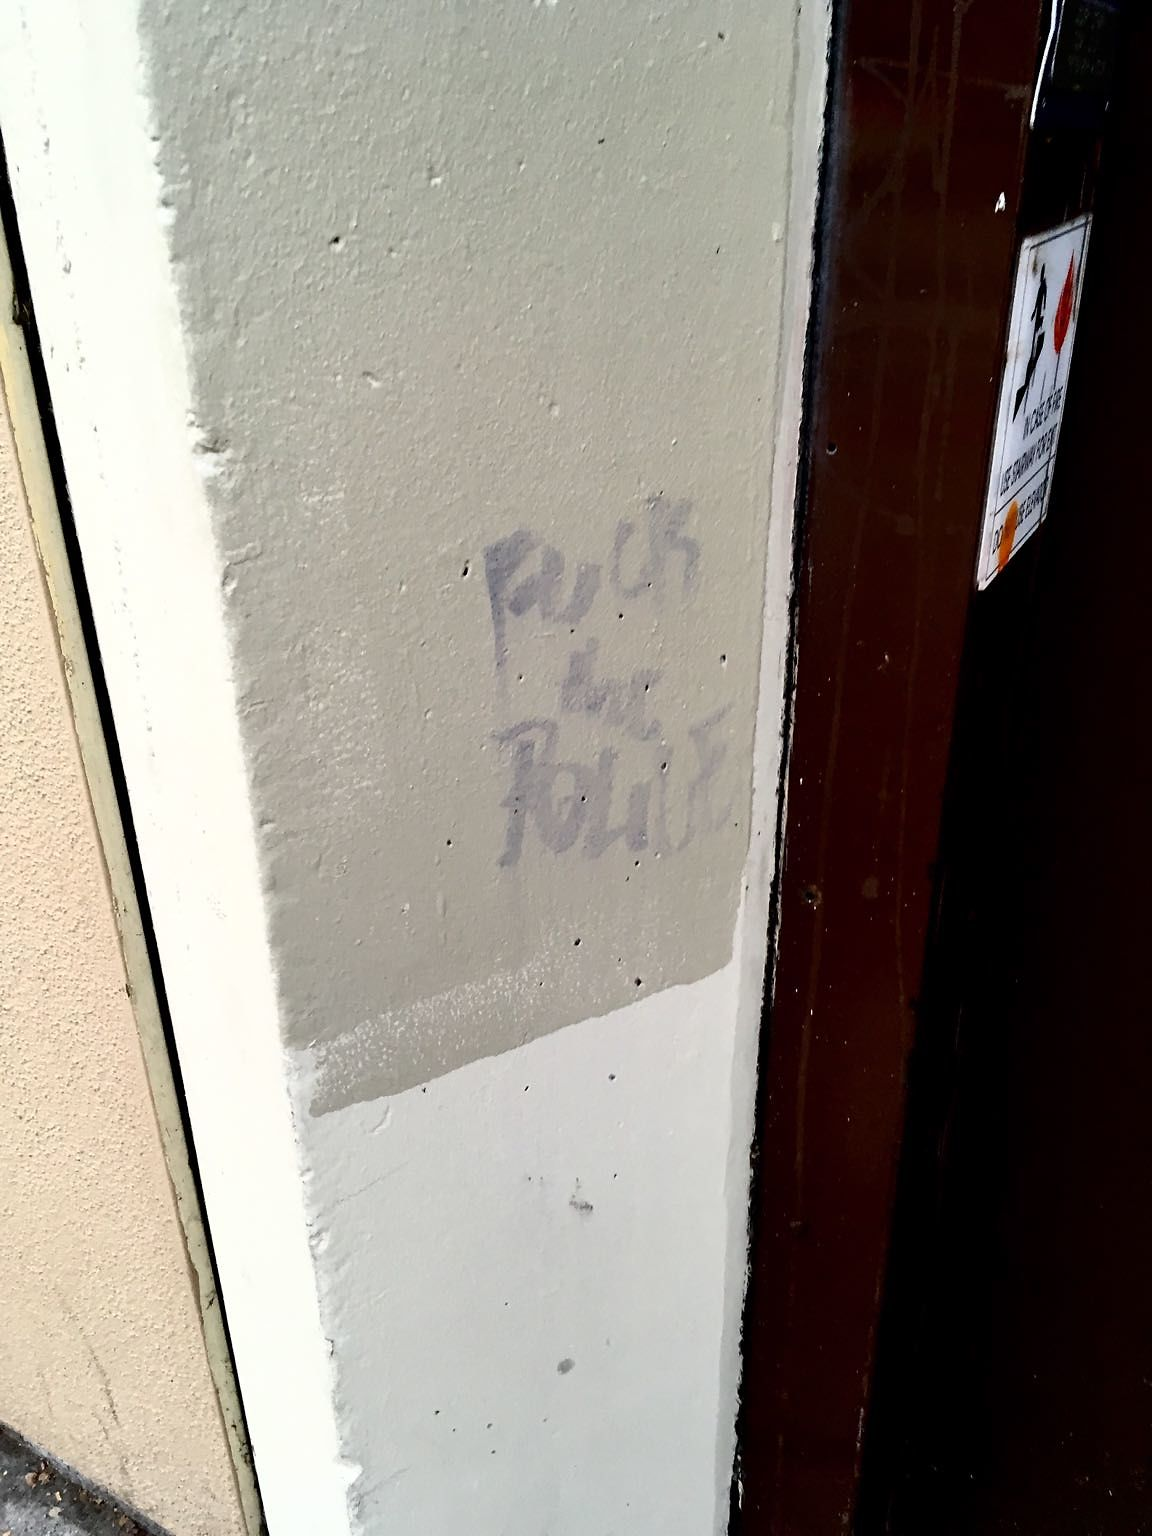

In [47]:
print(images[20])
Image(images[20])


In [29]:
!pwd

/home/gdillon/JupyterPractice/graffiti_SF311


In [52]:
peskin[:1000].to_csv("./imagelist.txt", index=False)

In [53]:
!yes| bash vidCreate.sh

idn_encode failed (3): 'Non-digit/letter/hyphen in input'
--2016-12-13 14:23:50--  http://%22%22/
Resolving "" ("")... failed: Name or service not known.
wget: unable to resolve host address '""'
--2016-12-13 14:23:50--  http://%22%22/
Resolving "" ("")... failed: Name or service not known.
wget: unable to resolve host address '""'
--2016-12-13 14:23:50--  http://mobile311.sfgov.org/media/san_francisco/report/photos/584f51eb3da19793c74ccea5/report.jpg
Resolving mobile311.sfgov.org (mobile311.sfgov.org)... 54.144.250.241
Connecting to mobile311.sfgov.org (mobile311.sfgov.org)|54.144.250.241|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 239172 (234K) [image/jpeg]
Saving to: 'report.jpg'

report.jpg          100%[===================>] 233.57K  1007KB/s    in 0.2s    

2016-12-13 14:23:50 (1007 KB/s) - 'report.jpg' saved [239172/239172]

--2016-12-13 14:23:50--  http://mobile311.sfgov.org/media/san_francisco/report/photos/584f3f7e3da19793c74ccc13/photo_20161212_1

In [28]:
'''
Had problems with this code, running standalone

%cd assets/
!wget -i ../imagelist.txt

!sleep 30
#%ls | gawk 'BEGIN{ a=1 }{ printf "mv \"%s\" %04d.jpg\n", $0, a++ }' | bash
#!sleep 10
#!convert -delay 50 *.jpg out.mp4
%cd ..
'''

'\nHad problems with this code, running standalone\n\n%cd assets/\n!wget -i ../imagelist.txt\n\n!sleep 30\n#%ls | gawk \'BEGIN{ a=1 }{ printf "mv "%s" %04d.jpg\n", $0, a++ }\' | bash\n#!sleep 10\n#!convert -delay 50 *.jpg out.mp4\n%cd ..\n'

In [29]:
#!convert -delay 50 *.jpg out.mp4


In [54]:
!ls -la


total 15904
drwxrwxr-x 5 gdillon gdillon     4096 Dec 13 14:24 .
drwxrwxr-x 8 gdillon gdillon     4096 Dec 13 10:41 ..
drwxrwxr-x 2 gdillon gdillon     4096 Dec 12 20:08 .ipynb_checkpoints
-rw-rw-r-- 1 gdillon gdillon    19266 Dec 12 21:21 ImportTablefromWikipedia.ipynb
-rw-rw-r-- 1 gdillon gdillon    98418 Dec 12 19:54 SF311 Annual .ipynb
-rw-rw-r-- 1 gdillon gdillon   276804 Dec 13 13:48 San+Fran +Graffiti pull one day.ipynb
-rw-rw-r-- 1 gdillon gdillon   562269 Dec  9 10:22 San+Francisco+Graffiti with Video.ipynb
drwxrwxr-x 2 gdillon gdillon    36864 Dec 10 22:21 assets
-rw-rw-r-- 1 gdillon gdillon     3712 Dec 13 14:23 imagelist.txt
drwxrwxr-x 2 gdillon gdillon    12288 Dec 13 14:23 input
-rw-rw-r-- 1 gdillon gdillon      168 Dec  9 16:49 pipevid.sh
-rw-rw-r-- 1 gdillon gdillon   430884 Dec 13 14:24 sfOneDay.ipynb
-rw-rw-r-- 1 gdillon gdillon      223 Dec 11 00:00 vidCreate.sh
-rw-rw-r-- 1 gdillon gdillon 14110852 Dec 13 14:23 video.gif
-rw-rw-r-- 1 gdillon gdillon   693865 Dec 10 

In [31]:
Image('report2.jpg')